In [6]:
#!/usr/bin/env python
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [156]:
# read csv files from hap.py result
haplotype_csv = pd.read_csv('hap.py/NA12878.benchmark.haplotype.summary.csv')
freebayes_csv = pd.read_csv('hap.py/NA12878.benchmark.freebayes.summary.csv')
strelka_csv = pd.read_csv('hap.py/NA12878.benchmark.strelka.summary.csv')

# required cols from data
req_cols = ['Type','TRUTH.TOTAL','TRUTH.TP','TRUTH.FN','QUERY.TOTAL','QUERY.FP','QUERY.UNK','METRIC.Recall', 'METRIC.Precision']

# Take only Filter PASS rows
haplotype_data = haplotype_csv[haplotype_csv.Filter == 'PASS'][req_cols]
freebayes_data = freebayes_csv[freebayes_csv.Filter == 'PASS'][req_cols]
strelka_data = strelka_csv[strelka_csv.Filter == 'PASS'][req_cols]

# add callers column
haplotype_data.insert(loc=0, column='Callers', value='Haplotype') 
freebayes_data.insert(loc=0, column='Callers', value='Freebayes') 
strelka_data.insert(loc=0, column='Callers', value='Strelka') 

# concat all data
all_data = pd.concat([haplotype_data, freebayes_data, strelka_data])
all_data

,Callers,Type,TRUTH.TOTAL,TRUTH.TP,TRUTH.FN,QUERY.TOTAL,QUERY.FP,QUERY.UNK,METRIC.Recall,METRIC.Precision
1,Haplotype,INDEL,7225,6032,1193,7248,1139,7,0.834879,0.842701
3,Haplotype,SNP,49523,47708,1815,50924,3205,0,0.963350,0.937063
1,Freebayes,INDEL,7350,5702,1648,8543,2865,33,0.775782,0.663337
3,Freebayes,SNP,49540,47501,2039,57653,10074,17,0.958841,0.825213
1,Strelka,INDEL,7350,5168,2182,15483,1014,9340,0.703129,0.834934
3,Strelka,SNP,49540,45285,4255,159382,2389,111657,0.914110,0.949942


<Figure size 720x360 with 0 Axes>

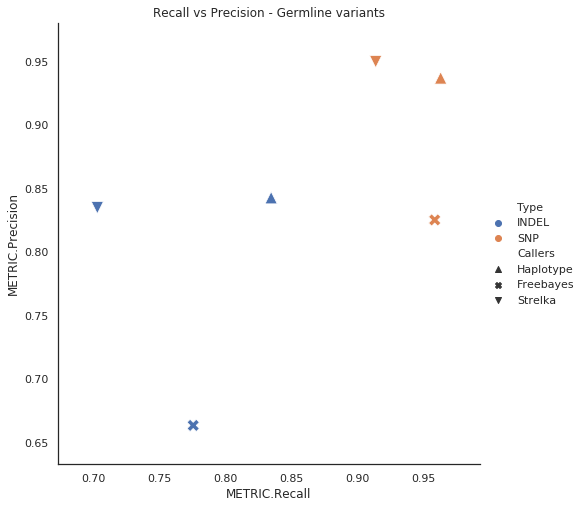

In [158]:
plt.figure(figsize=(10,5))
sns.set(style="white")
markers = {"Haplotype": "^", "Freebayes": "X", "Strelka":"v"}
sns_plot = sns.relplot(data=all_data, x="METRIC.Recall", y="METRIC.Precision",hue='Type', style='Callers', 
                markers=markers, height=7, s=150)
plt.title("Recall vs Precision - Germline variants")
plt.savefig('scatter_plot.png', bbox_inches="tight")